# Wind Power Prediction --- Time Series

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import tensorflow as tf
from tensorflow.python.keras.layers import Dense,Dropout
from tensorflow.python.keras.models import Sequential
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

## Load the dataset

In [4]:
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/upwork/Wind/wind dataset.csv") #import the dataset

In [5]:
data.head()

,Timeseries,T amb (Degree),DewPoint\n(Degree),Relative Humidity\n(%),Pressure mBar,WindDir (Degree),Wind Speed at 76.8 m\n(m/sec),Power Generated\n(kw)
0,01-01-2007 00:00,17.6,8.1,60.1,940.4,101,4.08,57.36
1,01-01-2007 01:00,17.9,10.8,63.1,941.4,114,4.74,89.54
2,01-01-2007 02:00,19.0,10.8,59.3,942.1,116,5.55,143.86
3,01-01-2007 03:00,20.6,10.6,52.8,942.4,113,6.04,184.45
4,01-01-2007 04:00,22.8,10.1,44.6,942.3,106,6.21,198.31


In [6]:
data.shape

(127392, 8)

In [7]:
data.isnull().sum() #there are three nan value 

Timeseries                       0
T amb (Degree)                   0
DewPoint\n(Degree)               0
Relative Humidity\n(%)           3
Pressure mBar                    0
WindDir (Degree)                 0
Wind Speed at 76.8 m\n(m/sec)    0
Power Generated\n(kw)            0
dtype: int64

In [8]:
np.where(data['Relative Humidity\n(%)'].isnull()) 

(array([127389, 127390, 127391]),)

In [9]:
clean_data = data.dropna() #here drop the nan values because nan value are very less so it is better to drop it

In [10]:
clean_data.isnull().sum()

Timeseries                       0
T amb (Degree)                   0
DewPoint\n(Degree)               0
Relative Humidity\n(%)           0
Pressure mBar                    0
WindDir (Degree)                 0
Wind Speed at 76.8 m\n(m/sec)    0
Power Generated\n(kw)            0
dtype: int64

In [11]:
clean_data.shape

(127389, 8)

## Exploratory data analysis

In [12]:
clean_data.describe() # describe the data

,T amb (Degree),DewPoint\n(Degree),Relative Humidity\n(%),Pressure mBar,WindDir (Degree),Wind Speed at 76.8 m\n(m/sec),Power Generated\n(kw)
count,127389.000000,127389.000000,127389.000000,127389.000000,127389.000000,127389.000000,127389.000000
mean,25.140394,16.761888,64.416859,935.451558,188.091350,6.395207,352.809746
std,4.075825,4.693398,22.275463,2.868167,92.356287,3.463204,457.056342
min,12.000000,-5.100000,8.500000,922.600000,0.000000,0.000000,0.000000
25%,22.100000,13.700000,46.400000,933.500000,93.000000,3.760000,0.000000
50%,24.400000,18.600000,67.600000,935.400000,242.000000,5.720000,152.600000
75%,27.600000,20.400000,84.300000,937.500000,266.000000,8.330000,476.660000
max,39.300000,25.100000,99.700000,945.200000,360.000000,25.480000,1500.000000


In [13]:
import seaborn as sns

In [14]:
cormat = clean_data.corr() # find the corrralation features
round(cormat,2)

,T amb (Degree),DewPoint\n(Degree),Relative Humidity\n(%),Pressure mBar,WindDir (Degree),Wind Speed at 76.8 m\n(m/sec),Power Generated\n(kw)
T amb (Degree),1.00,-0.20,-0.34,-0.20,-0.01,-0.11,-0.09
DewPoint\n(Degree),-0.20,1.00,0.63,-0.42,0.56,0.31,0.35
Relative Humidity\n(%),-0.34,0.63,1.00,-0.39,0.34,0.37,0.38
Pressure mBar,-0.20,-0.42,-0.39,1.00,-0.53,-0.45,-0.48
WindDir (Degree),-0.01,0.56,0.34,-0.53,1.00,0.29,0.33
Wind Speed at 76.8 m\n(m/sec),-0.11,0.31,0.37,-0.45,0.29,1.00,0.94
Power Generated\n(kw),-0.09,0.35,0.38,-0.48,0.33,0.94,1.00


### Correlation matrix to heat map

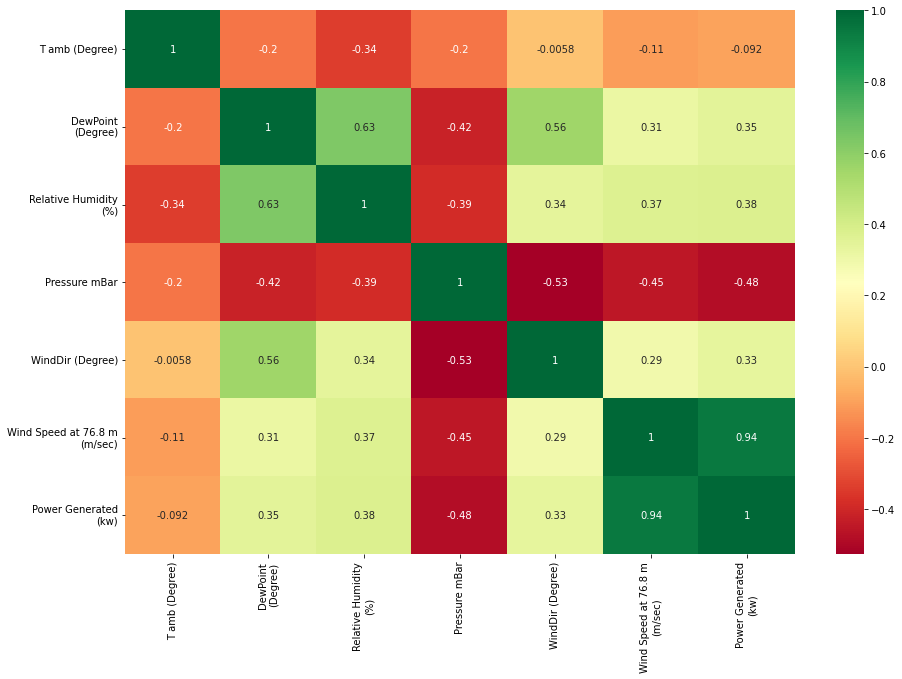

In [15]:
# Finds correlation between Independent and dependent attributes 
# 1 --->highly positive corelated features
# 0 ---> highly negative corelated features

plt.figure(figsize = (15,10))
sns.heatmap(clean_data.corr(), annot = True, cmap = "RdYlGn")

plt.show()

Here wind speed and power generated highly positive corelated feature

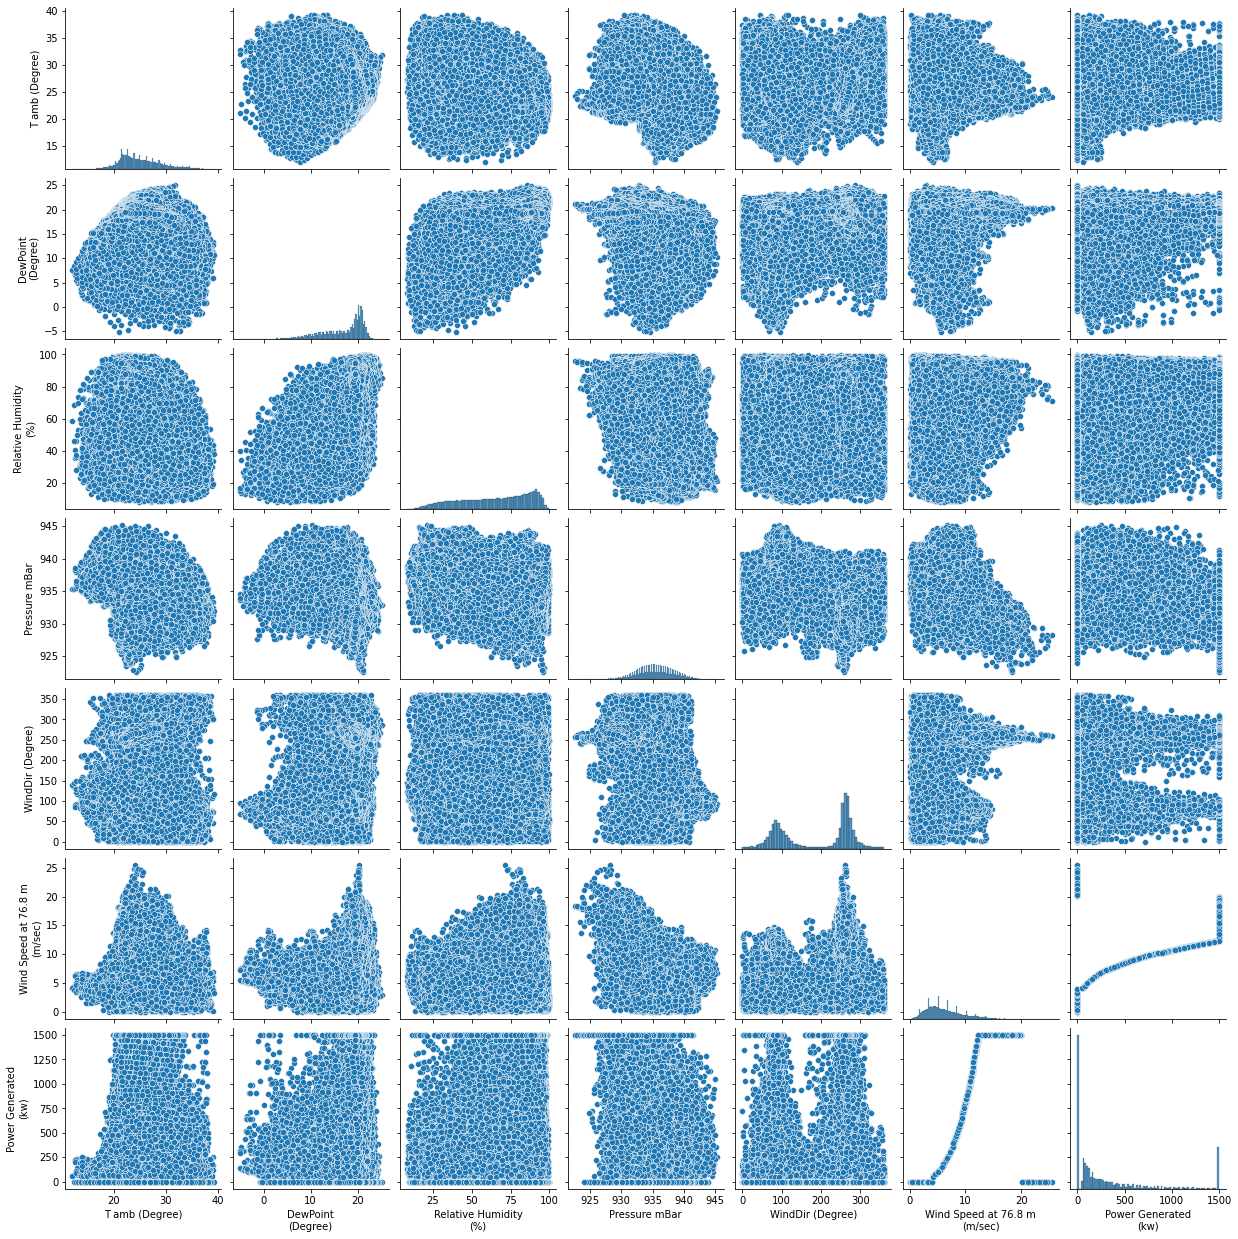

In [ ]:
sns.pairplot(clean_data)   # This is a pair plot the way to visualize relationships between each variable

In [16]:
clean_data['Timeseries'].unique() # unique values in time series column

array(['01-01-2007 00:00', '01-01-2007 01:00', '01-01-2007 02:00', ...,
       '7/13/2021 18:06', '7/13/2021 19:06', '7/13/2021 20:06'],
      dtype=object)

In [ ]:
clean_data['Date'] = pd.to_datetime(clean_data['Timeseries']).dt.date  # create date column and split the date from datetime('Timeseries') column

In [ ]:
clean_data['Date']= pd.to_datetime(clean_data['Date']) # change datatype object to date

In [19]:
clean_data.set_index('Date', inplace=True) # make column index

In [20]:
clean_data.index

DatetimeIndex(['2007-01-01', '2007-01-01', '2007-01-01', '2007-01-01',
               '2007-01-01', '2007-01-01', '2007-01-01', '2007-01-01',
               '2007-01-01', '2007-01-01',
               ...
               '2021-07-13', '2021-07-13', '2021-07-13', '2021-07-13',
               '2021-07-13', '2021-07-13', '2021-07-13', '2021-07-13',
               '2021-07-13', '2021-07-13'],
              dtype='datetime64[ns]', name='Date', length=127389, freq=None)

Resampling generates a unique sampling distribution on the basis of the actual data. We can apply various frequency to resample our time series data. This is a very important technique in the field of analytics.
Most commonly used time series frequency are –
1. W : weekly frequency
2. M : month end frequency
3. SM : semi-month end frequency (15th and end of month)
4. Q : quarter end frequency

In [21]:
clean_data['Wind Speed at 76.8 m\n(m/sec)'].resample('M').mean().head()

Date
2007-01-31    5.415645
2007-02-28    4.364970
2007-03-31    3.473360
2007-04-30    3.495833
2007-05-31    6.194866
Freq: M, Name: Wind Speed at 76.8 m\n(m/sec), dtype: float64

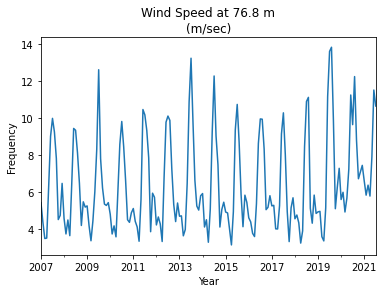

In [22]:
clean_data['Wind Speed at 76.8 m\n(m/sec)'].resample('M').mean().plot()
plt.title('Wind Speed at 76.8 m\n(m/sec)')
plt.xlabel("Year")
plt.ylabel("Frequency")

plt.show()

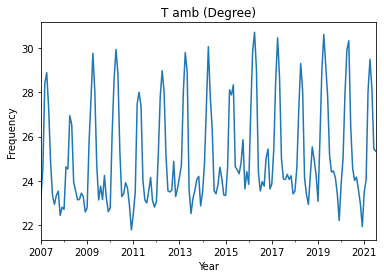

In [23]:
clean_data['T amb (Degree)'].resample('M').mean().plot()
plt.title('T amb (Degree)')
plt.xlabel("Year")
plt.ylabel("Frequency")

plt.show()

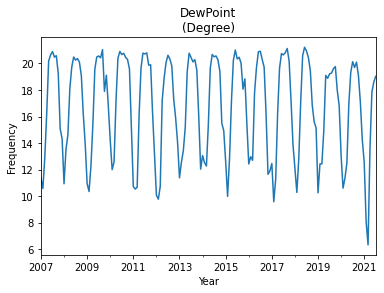

In [24]:
clean_data['DewPoint\n(Degree)'].resample('M').mean().plot()
plt.title('DewPoint\n(Degree)')
plt.xlabel("Year")
plt.ylabel("Frequency")

plt.show()

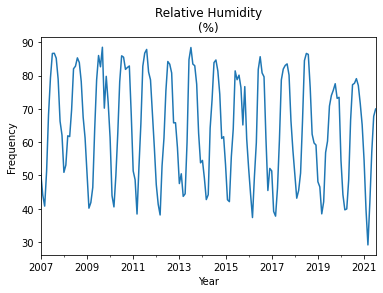

In [26]:
clean_data['Relative Humidity\n(%)'].resample('M').mean().plot()
plt.title('Relative Humidity\n(%)')
plt.xlabel("Year")
plt.ylabel("Frequency")

plt.show()

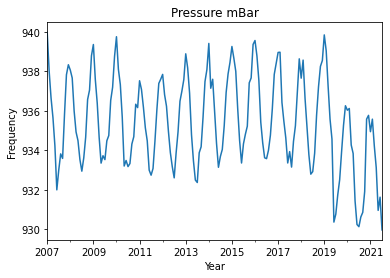

In [27]:
clean_data['Pressure mBar'].resample('M').mean().plot()
plt.title('Pressure mBar')
plt.xlabel("Year")
plt.ylabel("Frequency")

plt.show()

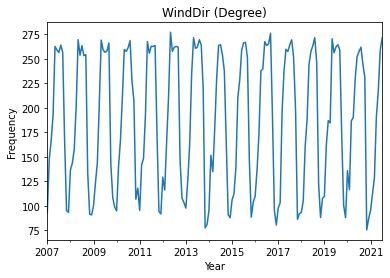

In [28]:
clean_data['WindDir (Degree)'].resample('M').mean().plot()
plt.title('WindDir (Degree)')
plt.xlabel("Year")
plt.ylabel("Frequency")

plt.show()

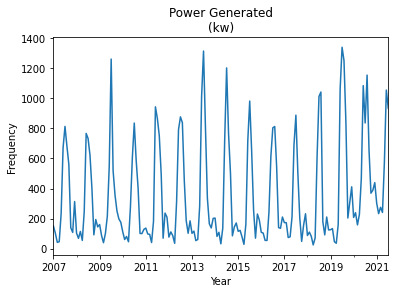

In [29]:
clean_data['Power Generated\n(kw)'].resample('M').mean().plot()
plt.title('Power Generated\n(kw)')
plt.xlabel("Year")
plt.ylabel("Frequency")

plt.show()

Separate the data into input features and output feature

In [ ]:
clean_data.columns

Index(['Timeseries', 'T amb (Degree)', 'DewPoint\n(Degree)',
       'Relative Humidity\n(%)', 'Pressure mBar', 'WindDir (Degree)',
       'Wind Speed at 76.8 m\n(m/sec)', 'Power Generated\n(kw)'],
      dtype='object')

In [ ]:
X = clean_data.drop(['Timeseries','Power Generated\n(kw)'],axis=1) #input features
y = clean_data['Power Generated\n(kw)'] #output feature

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3) #split data into 70% train and 30% test

In [ ]:
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((89172, 6), (38217, 6), (89172,), (38217,))

## Feature Scaling
min-max normalization, rescaling is the simplest method and consists 
in rescaling the range of features to scale the range in [0, 1]

In [ ]:
y_train=y_train.values.reshape(-1,1)
y_val=y_val.values.reshape(-1,1)

scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()

print(scaler_x.fit(X_train))
xtrain_scale=scaler_x.transform(X_train)

print(scaler_x.fit(X_val))
xval_scale=scaler_x.transform(X_val)

print(scaler_y.fit(y_train))
ytrain_scale=scaler_y.transform(y_train)

print(scaler_y.fit(y_val))
yval_scale=scaler_y.transform(y_val)

MinMaxScaler()
MinMaxScaler()
MinMaxScaler()
MinMaxScaler()


## ANN Model

In [ ]:
model = Sequential()
model.add(Dense(32, input_dim=6, kernel_initializer='normal', activation='relu')) #input layer
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='linear')) # output layer
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 32)                224       
_________________________________________________________________
dense_4 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_5 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_6 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_7 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 65        
Total params: 14,881
Trainable params: 14,881
Non-trainable params: 0
__________________________________________________

In [ ]:
model.compile(loss='mse', optimizer='SGD', metrics=['mse','mae'])  # compile the model
history=model.fit(xtrain_scale, ytrain_scale, epochs=30, batch_size=200, verbose=1, validation_split=0.2)

Epoch 1/30
357/357 [==============================] - 3s 5ms/step - loss: 0.0892 - mse: 0.0892 - mae: 0.2246 - val_loss: 0.0826 - val_mse: 0.0826 - val_mae: 0.2210
Epoch 2/30
357/357 [==============================] - 2s 5ms/step - loss: 0.0734 - mse: 0.0734 - mae: 0.2076 - val_loss: 0.0631 - val_mse: 0.0631 - val_mae: 0.1926
Epoch 3/30
357/357 [==============================] - 2s 4ms/step - loss: 0.0493 - mse: 0.0493 - mae: 0.1670 - val_loss: 0.0356 - val_mse: 0.0356 - val_mae: 0.1454
Epoch 4/30
357/357 [==============================] - 1s 3ms/step - loss: 0.0241 - mse: 0.0241 - mae: 0.1137 - val_loss: 0.0149 - val_mse: 0.0149 - val_mae: 0.0887
Epoch 5/30
357/357 [==============================] - 1s 3ms/step - loss: 0.0097 - mse: 0.0097 - mae: 0.0672 - val_loss: 0.0064 - val_mse: 0.0064 - val_mae: 0.0497
Epoch 6/30
357/357 [==============================] - 1s 2ms/step - loss: 0.0047 - mse: 0.0047 - mae: 0.0423 - val_loss: 0.0040 - val_mse: 0.0040 - val_mae: 0.0365
Epoch 7/30
357/3

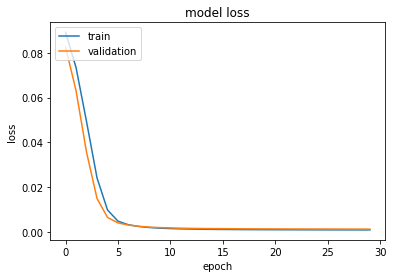

In [ ]:
# loss curve
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
test_predictions = model.predict(xval_scale)  # prediction on test data

In [ ]:
test_predictions = scaler_y.inverse_transform(test_predictions) # inverse transform of scale data
test_predictions

In [ ]:
y_train_pred = model.predict(xtrain_scale) # prediction on train data

print("The R2 score on the Train set is:\t{:0.3f}".format(r2_score(ytrain_scale, y_train_pred))) # r2 score of train data
print("The R2 score on the Test set is:\t{:0.3f}".format(r2_score(y_val, test_predictions)))  # r2 score of test data

The R2 score on the Train set is:	0.990
The R2 score on the Test set is:	0.976


R2 corresponds to the squared correlation between the observed outcome values and the predicted values.
The Higher the R-squared, the better the model.

Large positive linear association. The points are close to the linear trend line. Correlation  R2 = 0.976. Small positive linear association. The points are far from the trend line.

R-squared need to be above 0.95 for a regression model to be considered reliable. 

In [ ]:
x_scale=scaler_x.transform(X)
x_scale=scaler_x.transform(X) 
predictions = model.predict(x_scale) #predicton on complete dataset

predictions1 = scaler_y.inverse_transform(predictions) # inverse transform of scale data

In [ ]:
predictions1[0:10]

array([[ 54.3441 ],
       [106.67655],
       [176.26477],
       [226.16411],
       [238.68558],
       [285.34317],
       [259.2824 ],
       [206.5458 ],
       [177.09383],
       [136.62627]], dtype=float32)

In [ ]:
print("The R2 score on the dataset is:\t{:0.3f}".format(r2_score(y, predictions1)))

The R2 score on the dataset is:	0.976


In [ ]:
clean_data['Predicted_Power Generated\n(kw)'] = predictions1 # create a prediction column

Plot the data Acutal vs Predicted Output

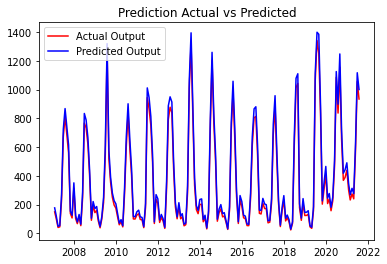

In [ ]:
plt.plot(clean_data['Power Generated\n(kw)'].resample('M').mean(), color = 'red', label = 'Actual Output')
plt.plot(clean_data['Predicted_Power Generated\n(kw)'].resample('M').mean(), color = 'blue', label = 'Predicted Output')
plt.title('Prediction Actual vs Predicted')
plt.legend()
plt.show()

In [ ]:
clean_data.head()

,Timeseries,T amb (Degree),DewPoint\n(Degree),Relative Humidity\n(%),Pressure mBar,WindDir (Degree),Wind Speed at 76.8 m\n(m/sec),Power Generated\n(kw),Predicted_Power Generated\n(kw)
Date,,,,,,,,,
2007-01-01,01-01-2007 00:00,17.6,8.1,60.1,940.4,101,4.08,57.36,54.344101
2007-01-01,01-01-2007 01:00,17.9,10.8,63.1,941.4,114,4.74,89.54,106.676552
2007-01-01,01-01-2007 02:00,19.0,10.8,59.3,942.1,116,5.55,143.86,176.264771
2007-01-01,01-01-2007 03:00,20.6,10.6,52.8,942.4,113,6.04,184.45,226.164108
2007-01-01,01-01-2007 04:00,22.8,10.1,44.6,942.3,106,6.21,198.31,238.685577


In [ ]:
clean_data[clean_data['Predicted_Power Generated\n(kw)']<0] = 0 # if prediction is negative replace it 0

In [ ]:
clean_data.to_csv('wind_power_prediction_data.csv',index=False) # save the csv